# Bank Marketing Data Set 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attribute Information:
Input variables:
### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("bankdata.csv")

In [3]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
train.shape

(41188, 21)

In [5]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
#checking if there any missing values in the dataset
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
from pandas import set_option
correlation = train.corr()
set_option('display.width', 100)
set_option('precision', 3)
print (correlation)

                      age   duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
age             1.000e+00 -8.657e-04     0.005 -0.034     0.024    -3.707e-04       8.567e-04   
duration       -8.657e-04  1.000e+00    -0.072 -0.048     0.021    -2.797e-02       5.312e-03   
campaign        4.594e-03 -7.170e-02     1.000  0.053    -0.079     1.508e-01       1.278e-01   
pdays          -3.437e-02 -4.758e-02     0.053  1.000    -0.588     2.710e-01       7.889e-02   
previous        2.436e-02  2.064e-02    -0.079 -0.588     1.000    -4.205e-01      -2.031e-01   
emp.var.rate   -3.707e-04 -2.797e-02     0.151  0.271    -0.420     1.000e+00       7.753e-01   
cons.price.idx  8.567e-04  5.312e-03     0.128  0.079    -0.203     7.753e-01       1.000e+00   
cons.conf.idx   1.294e-01 -8.173e-03    -0.014 -0.091    -0.051     1.960e-01       5.899e-02   
euribor3m       1.077e-02 -3.290e-02     0.135  0.297    -0.454     9.722e-01       6.882e-01   
nr.employed    -1.773e-02 -4.4

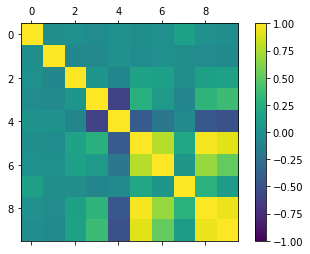

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [10]:
train.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
train.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
train.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [13]:
train.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
train[train['y']== 'yes']['education'].value_counts()

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

In [15]:
train[train['y']== 'yes']['job'].value_counts()

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

In [16]:
train[train['y']== 'yes']['marital'].value_counts()

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

In [17]:
train[train['y']== 'yes']['contact'].value_counts()

cellular     3853
telephone     787
Name: contact, dtype: int64

In [18]:
train.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [19]:
#label encoding of  categorical features
train['education']= train['education'].map({'basic.9y':0,'basic.6y':1,'basic.4y':2,'high.school':3,
                                           'professional.course':4,'university.degree':5,
                                           'unknown':6,'illiterate':7})
train['job']= train['job'].map({'blue-collar':0,'services':1,'entrepreneur':2,'housemaid':3,
                               'self-employed':4,'technician':5,'management':6,'unknown':7,
                               'admin.':8,'unemployed':9,'retired':10,'student':11})
train['marital']= train['marital'].map({'married':0,'divorced':1,'single':2,'unknown':3})
train['poutcome']= train['poutcome'].map({'nonexistent':0, 'failure':1,'success':2})
train['contact']= train['contact'].map({'telephone':0,'cellular':1})
train['y']= train['y'].map({'yes':1,'no':0})

In [20]:
train['job'].head()

0    3
1    1
2    1
3    8
4    1
Name: job, dtype: int64

In [21]:
#one hot encoding
num = train.loc[:,['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',   
                   'cons.conf.idx','euribor3m','nr.employed','education','job','marital','poutcome',
                  'contact','y']]
cat = train.loc[:,['default','housing','loan','month',
                  'day_of_week']]
cat1= pd.get_dummies(cat, drop_first = True)

In [22]:
data_set = pd.concat([num, cat1], axis= 1)
data_set.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'education', 'job', 'marital', 'poutcome',
       'contact', 'y', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [23]:
X = data_set.loc[:, data_set.columns != 'y']
Y = data_set.loc[:, ['y']]

In [24]:
# Splitting the train_data into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

C:\Users\Asmita\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((32950, 34), (8238, 34))

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [148]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [150]:
for name, model in models :
    kfold = KFold(n_splits=10,shuffle = False, random_state=100)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    cv_result= cv_results.mean()
    
    model.fit(X_train, Y_train)
    prediction= model.predict(X_test)
    acc_score = accuracy_score(Y_test, prediction)
    f1_sco = f1_score(Y_test, prediction)
    auc_roc = roc_auc_score(Y_test, prediction)
    con_matrix= confusion_matrix(Y_test, prediction)
    
    print ("Model Used : {}".format(name))
    print ("Cross Validation Score : {:.2f}".format(cv_result))
    print("Accuracy Score : {:.2f}".format(acc_score))
    print("f1 Score : {:.2f}".format(f1_sco))
    print("Roc Auc Score : {:.2f}".format(auc_roc))
    print("Confusion Matrix : {}".format(con_matrix))
    print("------------------------------------------------------------------------")
    

Model Used : LR
Cross Validation Score : 0.91
Accuracy Score : 0.91
f1 Score : 0.54
Roc Auc Score : 0.71
Confusion Matrix : [[7110  209]
 [ 502  417]]
------------------------------------------------------------------------
Model Used : LDA
Cross Validation Score : 0.91
Accuracy Score : 0.91
f1 Score : 0.59
Roc Auc Score : 0.75
Confusion Matrix : [[7021  298]
 [ 413  506]]
------------------------------------------------------------------------
Model Used : KNN
Cross Validation Score : 0.90
Accuracy Score : 0.91
f1 Score : 0.56
Roc Auc Score : 0.74
Confusion Matrix : [[7013  306]
 [ 445  474]]
------------------------------------------------------------------------
Model Used : CART
Cross Validation Score : 0.89
Accuracy Score : 0.89
f1 Score : 0.52
Roc Auc Score : 0.74
Confusion Matrix : [[6842  477]
 [ 426  493]]
------------------------------------------------------------------------
Model Used : NB
Cross Validation Score : 0.88
Accuracy Score : 0.88
f1 Score : 0.48
Roc Auc Score : 

In [151]:
models = []
models.append(('ET', ExtraTreesClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('XGB', XGBClassifier()))

In [153]:
for name, model in models :
     kfold = KFold(n_splits=10,shuffle = False, random_state=100)
     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
     cv_result= cv_results.mean()
    
     model.fit(X_train, Y_train)
     prediction= model.predict(X_test)
     acc_score = accuracy_score(Y_test, prediction)
     f1_sco = f1_score(Y_test, prediction)
     auc_roc = roc_auc_score(Y_test, prediction)
     con_matrix= confusion_matrix(Y_test, prediction)
    
     print ("Model Used : {}".format(name))
     print ("Cross Validation Score : {:.2f}".format(cv_result))
     print("Accuracy Score : {:.2f}".format(acc_score))
     print("f1 Score : {:.2f}".format(f1_sco))
     print("Roc Auc Score : {:.2f}".format(auc_roc))
     print("Confusion Matrix : {}".format(con_matrix))
     print("------------------------------------------------------------------------")
    

Model Used : ET
Cross Validation Score : 0.90
Accuracy Score : 0.90
f1 Score : 0.47
Roc Auc Score : 0.67
Confusion Matrix : [[7110  209]
 [ 575  344]]
------------------------------------------------------------------------
Model Used : ADA
Cross Validation Score : 0.91
Accuracy Score : 0.92
f1 Score : 0.54
Roc Auc Score : 0.71
Confusion Matrix : [[7122  197]
 [ 501  418]]
------------------------------------------------------------------------
Model Used : GB
Cross Validation Score : 0.92
Accuracy Score : 0.92
f1 Score : 0.63
Roc Auc Score : 0.77
Confusion Matrix : [[7081  238]
 [ 392  527]]
------------------------------------------------------------------------
Model Used : RFC
Cross Validation Score : 0.91
Accuracy Score : 0.91
f1 Score : 0.50
Roc Auc Score : 0.69
Confusion Matrix : [[7103  216]
 [ 542  377]]
------------------------------------------------------------------------
Model Used : LGBM
Cross Validation Score : 0.92
Accuracy Score : 0.92
f1 Score : 0.63
Roc Auc Score : 

### Hyperparameter tuning of GBM and XGBoost

In [157]:
parameters= {'n_estimators':range(20,81,5)}
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
            min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,
            random_state=10), param_grid = parameters, scoring='accuracy',n_jobs=4,iid=False, cv=10)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_
print(best_accuracy, best_parameter)

0.9151744868251145 {'n_estimators': 65}


In [158]:
parameter2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
grid_search2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=65,
                max_features='sqrt', subsample=0.8, random_state=10), param_grid = parameter2,
                scoring='accuracy',n_jobs=4,iid=False, cv=10)
grid_search2.fit(X_train,Y_train)
grid_search2.grid_scores_, grid_search2.best_params_, grid_search2.best_score_

([mean: 0.91351, std: 0.00329, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.91360, std: 0.00302, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.91375, std: 0.00329, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.91332, std: 0.00388, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.91396, std: 0.00305, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.91475, std: 0.00402, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.91572, std: 0.00437, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.91436, std: 0.00371, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.91487, std: 0.00404, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.91490, std: 0.00303, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.91411, std: 0.00324, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.91460, std: 0.00413, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [ ]:
parameter3 = {'max_features':range(10,40,3), 'min_samples_leaf':range(30,71,10)}
grid_search3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=65,
                max_depth=13, subsample=0.8, random_state=10, min_samples_split = 600),
               param_grid = parameter3, scoring='accuracy',n_jobs=4,iid=False, cv=10)
grid_search3.fit(X_train, Y_train)
grid_search3.grid_scores_, grid_search3.best_params_, grid_search3.best_score_

In [29]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_train, Y_train)
prediction1 = xgb1.predict(X_test)
accuracy = accuracy_score(Y_test, prediction1)
print(accuracy)

0.9180626365622724


In [30]:
#read the submission file
submission = pd.DataFrame({'Actual' : Y_test, 'predicted' : prediction1})

In [31]:
submission['Actual']= submission['Actual'].map({0 :'No', 1:'Yes'})
submission['predicted']= submission['predicted'].map({0 :'No', 1:'Yes'})

In [32]:
submission.to_csv('predicted1.csv', index= False)